# Bag of Tricks Experiment

Analyze the effects of our different "tricks".

1. Sample matches off mask
2. Scale by hard negatives
3. L2 pixel loss on matches

We will compare standard network, networks missing one trick only, and a network without any tricks (i.e same as Tanner Schmidt)

In [1]:
import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()
from dense_correspondence.training.training import *
import sys
import logging

# utils.set_default_cuda_visible_devices()
utils.set_cuda_visible_devices([0]) # use this to manually set CUDA_VISIBLE_DEVICES

from dense_correspondence.training.training import DenseCorrespondenceTraining
from dense_correspondence.dataset.spartan_dataset_masked import SpartanDataset
logging.basicConfig(level=logging.INFO)


/home/manuelli/code/modules/dense_correspondence_manipulation/utils/transformations.py:1912: UserWarning: failed to import module _transformations
  warnings.warn('failed to import module %s' % name)


setting CUDA_VISIBLE_DEVICES =  0,


In [2]:
dataset_config_filename = os.path.join(utils.getDenseCorrespondenceSourceDir(), 'config', 'dense_correspondence', 
                               'dataset', 'composite', "caterpillar_baymax_starbot_all_front_single_only.yaml")

train_config_file = os.path.join(utils.getDenseCorrespondenceSourceDir(), 'config', 'dense_correspondence', 
                               'training', 'training.yaml')



logging_dir = "code/data_volume/pdc/trained_models/trick_analysis"
num_iterations = 3500
num_image_pairs = 100
debug = False

TRAIN = True
EVALUATE = True


# num_image_pairs = 10
# num_iterations = 10

d = 3

network_dict = dict()


## Standard

In [3]:
# dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)
# dataset = SpartanDataset(config=dataset_config)


# train_config = utils.getDictFromYamlFilename(train_config_file)

# name = "standard_%d" %(d)
# print "training %s" %(name)
# train_config = utils.getDictFromYamlFilename(train_config_file)
# train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
# train._config["training"]["logging_dir"] = logging_dir
# train._config["training"]["logging_dir_name"] = name
# train._config["training"]["num_iterations"] = num_iterations
# train._config["dense_correspondence_network"]["descriptor_dimension"] = d


# if TRAIN:
#     train.run()
# print "finished training descriptor of dimension %d" %(d)

#  # now do evaluation
# print "running evaluation on network %s" %(name)
# model_folder = os.path.join(logging_dir, name)
# model_folder = utils.convert_to_absolute_path(model_folder)
# network_dict[name] = model_folder
# if EVALUATE:
#     DCE = DenseCorrespondenceEvaluation
#     DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
# print "finished running evaluation on network %s" %(name)

## With L2 on masked non_matches

In [4]:
# dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)
# dataset = SpartanDataset(config=dataset_config)

# train_config = utils.getDictFromYamlFilename(train_config_file)
# name = "l2_masked_%d" %(d)
# print "training %s" %(name)
# train_config = utils.getDictFromYamlFilename(train_config_file)
# train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
# train._config["training"]["logging_dir"] = logging_dir
# train._config["training"]["logging_dir_name"] = name
# train._config["training"]["num_iterations"] = num_iterations

# train._config["dense_correspondence_network"]["descriptor_dimension"] = d

# train._config["loss_function"]["use_l2_pixel_loss_on_masked_non_matches"] = True



# if TRAIN:
#     train.run()
# print "finished training descriptor of dimension %d" %(d)

#  # now do evaluation
# print "running evaluation on network %s" %(name)
# model_folder = os.path.join(logging_dir, name)
# model_folder = utils.convert_to_absolute_path(model_folder)
# network_dict[name] = model_folder
# if EVALUATE:
#     DCE = DenseCorrespondenceEvaluation
#     DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
# print "finished running evaluation on network %s" %(name)

## Dont scale by hard negatives

In [5]:
# dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)

# dataset = SpartanDataset(config=dataset_config)
# train_config = utils.getDictFromYamlFilename(train_config_file)

# name = "dont_scale_hard_negatives_%d" %(d)
# print "training %s" %(name)
# train_config = utils.getDictFromYamlFilename(train_config_file)
# train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
# train._config["training"]["logging_dir"] = logging_dir
# train._config["training"]["logging_dir_name"] = name
# train._config["training"]["num_iterations"] = num_iterations
# train._config["dense_correspondence_network"]["descriptor_dimension"] = d

# train._config["loss_function"]["scale_by_hard_negatives"] = False


# if TRAIN:
#     train.run()
# print "finished training descriptor of dimension %d" %(d)

#  # now do evaluation
# print "running evaluation on network %s" %(name)
# model_folder = os.path.join(logging_dir, name)
# model_folder = utils.convert_to_absolute_path(model_folder)
# network_dict[name] = model_folder
# if EVALUATE:
#     DCE = DenseCorrespondenceEvaluation
#     DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
# print "finished running evaluation on network %s" %(name)

## Dont sample off mask

In [6]:
dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)

dataset = SpartanDataset(config=dataset_config)
train_config = utils.getDictFromYamlFilename(train_config_file)

name = "dont_sample_from_mask_%d" %(d)
print "training %s" %(name)
train_config = utils.getDictFromYamlFilename(train_config_file)
train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
train._config["training"]["logging_dir"] = logging_dir
train._config["training"]["logging_dir_name"] = name
train._config["training"]["num_iterations"] = num_iterations
train._config["dense_correspondence_network"]["descriptor_dimension"] = d

train._config["training"]["sample_matches_only_off_mask"] = False
train._config["training"]["use_image_b_mask_inv"] = False
train._config["training"]["fraction_masked_non_matches"] = 0.01
train._config["training"]["fraction_background_non_matches"] = 0.99


if TRAIN:
    train.run()
print "finished training descriptor of dimension %d" %(d)

 # now do evaluation
print "running evaluation on network %s" %(name)
model_folder = os.path.join(logging_dir, name)
model_folder = utils.convert_to_absolute_path(model_folder)
network_dict[name] = model_folder
if EVALUATE:
    DCE = DenseCorrespondenceEvaluation
    DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
print "finished running evaluation on network %s" %(name)

## No tricks

In [7]:
dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)

dataset = SpartanDataset(config=dataset_config)
train_config = utils.getDictFromYamlFilename(train_config_file)

name = "no_tricks_%d" %(d)
print "training %s" %(name)
train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
train_config = utils.getDictFromYamlFilename(train_config_file)
train._config["training"]["logging_dir"] = logging_dir
train._config["training"]["logging_dir_name"] = name
train._config["training"]["num_iterations"] = num_iterations
train._config["dense_correspondence_network"]["descriptor_dimension"] = d

train._config["loss_function"]["scale_by_hard_negatives"] = False
train._config["loss_function"]["use_l2_pixel_loss_on_masked_non_matches"] = False
train._config["training"]["sample_matches_only_off_mask"] = False

train._config["training"]["use_image_b_mask_inv"] = False
train._config["training"]["fraction_masked_non_matches"] = 0.01
train._config["training"]["fraction_background_non_matches"] = 0.99



if TRAIN:
    train.run()
print "finished training descriptor of dimension %d" %(d)

 # now do evaluation
print "running evaluation on network %s" %(name)
model_folder = os.path.join(logging_dir, name)
model_folder = utils.convert_to_absolute_path(model_folder)
network_dict[name] = model_folder
if EVALUATE:
    DCE = DenseCorrespondenceEvaluation
    DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
print "finished running evaluation on network %s" %(name)

## L2 and dont scale hard negatives

INFO:root:Loading pose data for scene 2018-04-24-17-16-40


Using SpartanDataset:
   - in train mode
   - number of scenes 25
   - total images:     9923
training l2_dont_scale_hard_negatives_run_2_3


INFO:root:Loading pose data for scene 2018-04-24-17-34-46
INFO:root:Loading pose data for scene 2018-04-24-17-38-19
INFO:root:Loading pose data for scene 2018-05-07-22-04-57
INFO:root:Loading pose data for scene 2018-05-11-18-23-21
INFO:root:Loading pose data for scene 2018-05-11-18-21-13
INFO:root:Loading pose data for scene 2018-05-11-18-18-57
INFO:root:Loading pose data for scene 2018-05-11-18-17-14
INFO:root:Loading pose data for scene 2018-04-16-14-25-19
INFO:root:Loading pose data for scene 2018-04-16-14-40-25
INFO:root:Loading pose data for scene 2018-04-16-14-42-26
INFO:root:Loading pose data for scene 2018-04-16-14-44-53
INFO:root:Loading pose data for scene 2018-04-16-14-49-22
INFO:root:Loading pose data for scene 2018-04-16-15-23-41
INFO:root:Loading pose data for scene 2018-04-16-15-25-38
INFO:root:Loading pose data for scene 2018-04-16-15-28-45
INFO:root:Loading pose data for scene 2018-04-16-15-30-50
INFO:root:Loading pose data for scene 2018-05-04-19-42-34
INFO:root:Load

using SINGLE_OBJECT_WITHIN_SCENE


/usr/local/lib/python2.7/dist-packages/torch/nn/modules/module.py:482: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object
Same scene, same object


/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1423: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.878 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.205 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 10 of 3500
INFO:root:single iteration took 0.212 seconds
INFO:root:Training is 0 percent complete



Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.205 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 20 of 3500
INFO:root:single iteration took 0.209 seconds
INFO:root:Training is 0 percent complete



Same scene, same object
single iteration took 0.209 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.206 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 30 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 0 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 40 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 1 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 50 of 3500
INFO:root:single iteration took 0.212 seconds
INFO:root:Training is 1 percent complete



Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 60 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 1 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 70 of 3500
INFO:root:single iteration took 0.210 seconds
INFO:root:Training is 2 percent complete



Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.209 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 80 of 3500
INFO:root:single iteration took 0.213 seconds
INFO:root:Training is 2 percent complete



Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.209 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.206 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 90 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 2 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 100 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 2 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 110 of 3500
INFO:root:single iteration took 0.208 seconds
INFO:root:Training is 3 percent complete



Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 120 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 3 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.215 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 130 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 3 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 140 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 4 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.215 seconds

 empty

INFO:root:Training on iteration 160 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 4 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 170 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 4 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.207 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 180 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 5 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.216 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 190 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 5 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 200 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 5 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 210 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 6 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 220 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 6 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 230 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 6 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 240 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 6 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 250 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 7 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 260 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 7 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.218 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 270 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 7 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 280 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 8 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 290 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 8 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.208 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 300 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 8 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 310 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 8 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 320 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 9 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 330 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 9 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 340 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 9 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 350 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 10 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 360 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 10 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 370 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 10 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 380 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 10 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 390 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 11 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 400 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 11 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
single iteration took 0.220 seconds
Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 410 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 11 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 420 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 12 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.219 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 430 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 12 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 440 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 12 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 450 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 12 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 460 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 13 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 470 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 13 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 480 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 13 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 490 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 14 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 500 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 14 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 510 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 14 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 520 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 14 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 530 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 15 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 540 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 15 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


/home/manuelli/code/modules/dense_correspondence_manipulation/utils/utils.py:196: RuntimeWarning: invalid value encountered in arccos
  theta = 2*np.arccos(2 * np.dot(q,r)**2 - 1)


single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 550 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 15 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 560 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 16 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 570 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 16 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 580 of 3500
INFO:root:single iteration took 0.212 seconds
INFO:root:Training is 16 percent complete



Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 590 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 16 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 600 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 17 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 610 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 17 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 620 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 17 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 630 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 18 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 640 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 18 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 650 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 18 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 660 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 18 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 670 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 19 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.222 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 680 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 19 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 690 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 19 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.220 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 700 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 20 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 710 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 20 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 720 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 20 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 730 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 20 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 740 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 21 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 750 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 21 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 760 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 21 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 770 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 22 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 780 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 22 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 790 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 22 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 800 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 22 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 810 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 23 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 820 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 23 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 830 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 23 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 840 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 24 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 850 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 24 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


/home/manuelli/code/modules/dense_correspondence_manipulation/utils/utils.py:196: RuntimeWarning: invalid value encountered in arccos
  theta = 2*np.arccos(2 * np.dot(q,r)**2 - 1)


single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 860 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 24 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 870 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 24 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 880 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 25 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 890 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 25 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 900 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 25 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 910 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 26 percent complete



Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.216 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 920 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 26 percent complete



Same scene, same object
Same scene, same object
single iteration took 0.222 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 930 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 26 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 940 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 26 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 950 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 27 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 960 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 27 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 970 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 27 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.215 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 980 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 28 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 990 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 28 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1000 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 28 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1010 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 28 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1020 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 29 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1030 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 29 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1040 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 29 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1050 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 30 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1060 of 3500
INFO:root:single iteration took 0.216 seconds
INFO:root:Training is 30 percent complete



Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1070 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 30 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.220 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1080 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 30 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1090 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 31 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1100 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 31 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1110 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 31 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1120 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 32 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1130 of 3500
INFO:root:single iteration took 0.230 seconds
INFO:root:Training is 32 percent complete



Same scene, same object
single iteration took 0.230 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1140 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 32 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.223 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1150 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 32 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1160 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 33 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1170 of 3500
INFO:root:single iteration took 0.213 seconds
INFO:root:Training is 33 percent complete



Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1180 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 33 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1190 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 34 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1200 of 3500
INFO:root:single iteration took 0.215 seconds
INFO:root:Training is 34 percent complete



Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1210 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 34 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1220 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 34 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1230 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 35 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1240 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 35 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1250 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 35 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1260 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 36 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1270 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 36 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1280 of 3500
INFO:root:single iteration took 0.214 seconds
INFO:root:Training is 36 percent complete



Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.210 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1290 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 36 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1300 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 37 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1310 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 37 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1320 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 37 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1330 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 38 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1340 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 38 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1350 of 3500
INFO:root:single iteration took 0.228 seconds
INFO:root:Training is 38 percent complete



Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1360 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 38 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1370 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 39 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1380 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 39 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1390 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 39 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.230 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1400 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 40 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1410 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 40 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1420 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 40 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1430 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 40 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1440 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 41 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1450 of 3500
INFO:root:single iteration took 0.212 seconds
INFO:root:Training is 41 percent complete



Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1460 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 41 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1470 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 42 percent complete



Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1480 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 42 percent complete



Same scene, same object
Same scene, same object
single iteration took 0.221 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1490 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 42 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1500 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 42 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1510 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 43 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1520 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 43 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1530 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 43 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1540 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 44 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1550 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 44 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1560 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 44 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1570 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 44 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1580 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 45 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.232 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1590 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 45 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1600 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 45 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


/home/manuelli/code/modules/dense_correspondence_manipulation/utils/utils.py:196: RuntimeWarning: invalid value encountered in arccos
  theta = 2*np.arccos(2 * np.dot(q,r)**2 - 1)


single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1610 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 46 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.212 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1620 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 46 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1630 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 46 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.213 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1640 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 46 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1650 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 47 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1660 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 47 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1670 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 47 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.232 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1680 of 3500
INFO:root:single iteration took 0.227 seconds
INFO:root:Training is 48 percent complete



Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1690 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 48 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1700 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 48 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1710 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 48 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1720 of 3500
INFO:root:single iteration took 0.220 seconds
INFO:root:Training is 49 percent complete



Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1730 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 49 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.252 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
single iteration took 0.232 seconds
Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
single iteration took 0.227 seconds
Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1740 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 49 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.211 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1750 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 50 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
single iteration took 0.227 seconds
Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1760 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 50 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1770 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 50 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1780 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 50 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.215 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1790 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 51 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.230 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1800 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 51 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1810 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 51 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1820 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 52 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.218 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.220 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 1830 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 52 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1840 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 52 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1850 of 3500
INFO:root:single iteration took 0.219 seconds
INFO:root:Training is 52 percent complete



Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1860 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 53 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1870 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 53 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1880 of 3500
INFO:root:single iteration took 0.218 seconds
INFO:root:Training is 53 percent complete



Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1890 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 54 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1900 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 54 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1910 of 3500
INFO:root:single iteration took 0.225 seconds
INFO:root:Training is 54 percent complete



Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.232 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1920 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 54 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.214 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1930 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 55 percent complete



Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1940 of 3500
INFO:root:single iteration took 0.226 seconds
INFO:root:Training is 55 percent complete



Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1950 of 3500
INFO:root:single iteration took 0.217 seconds
INFO:root:Training is 55 percent complete



Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.217 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1960 of 3500
INFO:root:single iteration took 0.224 seconds
INFO:root:Training is 56 percent complete



Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1970 of 3500
INFO:root:single iteration took 0.221 seconds
INFO:root:Training is 56 percent complete



Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.216 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1980 of 3500
INFO:root:single iteration took 0.222 seconds
INFO:root:Training is 56 percent complete



Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.239 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.228 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.223 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 1990 of 3500
INFO:root:single iteration took 0.230 seconds
INFO:root:Training is 56 percent complete



Same scene, same object
single iteration took 0.230 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.222 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.225 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.227 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.224 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2000 of 3500
INFO:root:single iteration took 0.223 seconds
INFO:root:Training is 57 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.219 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.221 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.226 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.235 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.229 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.234 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.235 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2010 of 3500
INFO:root:single iteration took 0.232 seconds
INFO:root:Training is 57 percent complete



Same scene, same object
single iteration took 0.232 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.218 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.220 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.235 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.231 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.236 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.232 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.425 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2020 of 3500
INFO:root:single iteration took 0.300 seconds
INFO:root:Training is 57 percent complete



Same scene, same object
single iteration took 0.300 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2030 of 3500
INFO:root:single iteration took 0.384 seconds
INFO:root:Training is 58 percent complete



Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2040 of 3500
INFO:root:single iteration took 0.359 seconds
INFO:root:Training is 58 percent complete



Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2050 of 3500
INFO:root:single iteration took 0.358 seconds
INFO:root:Training is 58 percent complete



Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2060 of 3500
INFO:root:single iteration took 0.340 seconds
INFO:root:Training is 58 percent complete



Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2070 of 3500
INFO:root:single iteration took 0.376 seconds
INFO:root:Training is 59 percent complete



Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2080 of 3500
INFO:root:single iteration took 0.367 seconds
INFO:root:Training is 59 percent complete



Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2090 of 3500
INFO:root:single iteration took 0.361 seconds
INFO:root:Training is 59 percent complete



Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.424 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.402 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.431 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.439 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.425 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2100 of 3500
INFO:root:single iteration took 0.370 seconds
INFO:root:Training is 60 percent complete



Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2110 of 3500
INFO:root:single iteration took 0.372 seconds
INFO:root:Training is 60 percent complete



Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.402 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2120 of 3500
INFO:root:single iteration took 0.412 seconds
INFO:root:Training is 60 percent complete



Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.406 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.426 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2130 of 3500
INFO:root:single iteration took 0.431 seconds
INFO:root:Training is 60 percent complete



Same scene, same object
single iteration took 0.431 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2140 of 3500
INFO:root:single iteration took 0.368 seconds
INFO:root:Training is 61 percent complete



Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2150 of 3500
INFO:root:single iteration took 0.383 seconds
INFO:root:Training is 61 percent complete



Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2160 of 3500
INFO:root:single iteration took 0.398 seconds
INFO:root:Training is 61 percent complete



Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.308 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2170 of 3500
INFO:root:single iteration took 0.395 seconds
INFO:root:Training is 62 percent complete



Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.332 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.336 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2180 of 3500
INFO:root:single iteration took 0.397 seconds
INFO:root:Training is 62 percent complete



Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2190 of 3500
INFO:root:single iteration took 0.385 seconds
INFO:root:Training is 62 percent complete



Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2200 of 3500
INFO:root:single iteration took 0.392 seconds
INFO:root:Training is 62 percent complete



Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2210 of 3500
INFO:root:single iteration took 0.383 seconds
INFO:root:Training is 63 percent complete



Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.312 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2220 of 3500
INFO:root:single iteration took 0.372 seconds
INFO:root:Training is 63 percent complete



Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2230 of 3500
INFO:root:single iteration took 0.436 seconds
INFO:root:Training is 63 percent complete



Same scene, same object
single iteration took 0.436 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.449 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.410 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.429 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.432 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.435 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.441 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.419 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.425 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.418 seconds

 empty

INFO:root:Training on iteration 2250 of 3500
INFO:root:single iteration took 0.378 seconds
INFO:root:Training is 64 percent complete



Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2260 of 3500
INFO:root:single iteration took 0.420 seconds
INFO:root:Training is 64 percent complete



Same scene, same object
single iteration took 0.420 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.439 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.411 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2270 of 3500
INFO:root:single iteration took 0.348 seconds
INFO:root:Training is 64 percent complete



Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
single iteration took 0.374 seconds
Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.439 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.417 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.311 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2280 of 3500
INFO:root:single iteration took 0.337 seconds
INFO:root:Training is 65 percent complete



Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2290 of 3500
INFO:root:single iteration took 0.370 seconds
INFO:root:Training is 65 percent complete



Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2300 of 3500
INFO:root:single iteration took 0.372 seconds
INFO:root:Training is 65 percent complete



Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.327 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2310 of 3500
INFO:root:single iteration took 0.377 seconds
INFO:root:Training is 66 percent complete



Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.312 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2320 of 3500
INFO:root:single iteration took 0.381 seconds
INFO:root:Training is 66 percent complete



Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.417 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.421 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.418 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.427 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.421 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.406 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2330 of 3500
INFO:root:single iteration took 0.411 seconds
INFO:root:Training is 66 percent complete



Same scene, same object
single iteration took 0.411 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.413 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2340 of 3500
INFO:root:single iteration took 0.369 seconds
INFO:root:Training is 66 percent complete



Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2350 of 3500
INFO:root:single iteration took 0.370 seconds
INFO:root:Training is 67 percent complete



Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2360 of 3500
INFO:root:single iteration took 0.370 seconds
INFO:root:Training is 67 percent complete



Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.438 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.429 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2370 of 3500
INFO:root:single iteration took 0.400 seconds
INFO:root:Training is 67 percent complete



Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.436 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.420 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.318 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2380 of 3500
INFO:root:single iteration took 0.360 seconds
INFO:root:Training is 68 percent complete



Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2390 of 3500
INFO:root:single iteration took 0.348 seconds
INFO:root:Training is 68 percent complete



Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.426 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.405 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.336 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.333 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2400 of 3500
INFO:root:single iteration took 0.385 seconds
INFO:root:Training is 68 percent complete



Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2410 of 3500
INFO:root:single iteration took 0.389 seconds
INFO:root:Training is 68 percent complete



Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.328 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2420 of 3500
INFO:root:single iteration took 0.369 seconds
INFO:root:Training is 69 percent complete



Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2430 of 3500
INFO:root:single iteration took 0.355 seconds
INFO:root:Training is 69 percent complete



Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.336 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2440 of 3500
INFO:root:single iteration took 0.350 seconds
INFO:root:Training is 69 percent complete



Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.321 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2450 of 3500
INFO:root:single iteration took 0.363 seconds
INFO:root:Training is 70 percent complete



Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2460 of 3500
INFO:root:single iteration took 0.356 seconds
INFO:root:Training is 70 percent complete



Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2470 of 3500
INFO:root:single iteration took 0.366 seconds
INFO:root:Training is 70 percent complete



Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.405 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2480 of 3500
INFO:root:single iteration took 0.366 seconds
INFO:root:Training is 70 percent complete



Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.327 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.437 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.430 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.406 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2490 of 3500
INFO:root:single iteration took 0.384 seconds
INFO:root:Training is 71 percent complete



Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2500 of 3500
INFO:root:single iteration took 0.379 seconds
INFO:root:Training is 71 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.322 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2510 of 3500
INFO:root:single iteration took 0.343 seconds
INFO:root:Training is 71 percent complete



Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.325 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.284 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.327 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2520 of 3500
INFO:root:single iteration took 0.395 seconds
INFO:root:Training is 72 percent complete



Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.336 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2530 of 3500
INFO:root:single iteration took 0.379 seconds
INFO:root:Training is 72 percent complete



Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.330 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2540 of 3500
INFO:root:single iteration took 0.332 seconds
INFO:root:Training is 72 percent complete



Same scene, same object
single iteration took 0.332 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.369 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.402 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2550 of 3500
INFO:root:single iteration took 0.404 seconds
INFO:root:Training is 72 percent complete



Same scene, same object
single iteration took 0.404 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2560 of 3500
INFO:root:single iteration took 0.330 seconds
INFO:root:Training is 73 percent complete



Same scene, same object
single iteration took 0.330 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2570 of 3500
INFO:root:single iteration took 0.410 seconds
INFO:root:Training is 73 percent complete



Same scene, same object
single iteration took 0.410 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.439 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.416 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.421 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2580 of 3500
INFO:root:single iteration took 0.379 seconds
INFO:root:Training is 73 percent complete



Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2590 of 3500
INFO:root:single iteration took 0.384 seconds
INFO:root:Training is 74 percent complete



Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2600 of 3500
INFO:root:single iteration took 0.383 seconds
INFO:root:Training is 74 percent complete



Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2610 of 3500
INFO:root:single iteration took 0.371 seconds
INFO:root:Training is 74 percent complete



Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.326 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.338 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2620 of 3500
INFO:root:single iteration took 0.365 seconds
INFO:root:Training is 74 percent complete



Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.322 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2630 of 3500
INFO:root:single iteration took 0.376 seconds
INFO:root:Training is 75 percent complete



Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.332 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2640 of 3500
INFO:root:single iteration took 0.367 seconds
INFO:root:Training is 75 percent complete



Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.327 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2650 of 3500
INFO:root:single iteration took 0.315 seconds
INFO:root:Training is 75 percent complete



Same scene, same object
single iteration took 0.315 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.332 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2660 of 3500
INFO:root:single iteration took 0.371 seconds
INFO:root:Training is 76 percent complete



Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2670 of 3500
INFO:root:single iteration took 0.373 seconds
INFO:root:Training is 76 percent complete



Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2680 of 3500
INFO:root:single iteration took 0.368 seconds
INFO:root:Training is 76 percent complete



Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.338 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.324 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2690 of 3500
INFO:root:single iteration took 0.376 seconds
INFO:root:Training is 76 percent complete



Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2700 of 3500
INFO:root:single iteration took 0.349 seconds
INFO:root:Training is 77 percent complete



Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.406 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2710 of 3500
INFO:root:single iteration took 0.364 seconds
INFO:root:Training is 77 percent complete



Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2720 of 3500
INFO:root:single iteration took 0.389 seconds
INFO:root:Training is 77 percent complete



Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2730 of 3500
INFO:root:single iteration took 0.348 seconds
INFO:root:Training is 78 percent complete



Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.320 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2740 of 3500
INFO:root:single iteration took 0.390 seconds
INFO:root:Training is 78 percent complete



Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.323 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.323 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2750 of 3500
INFO:root:single iteration took 0.378 seconds
INFO:root:Training is 78 percent complete



Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.328 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2760 of 3500
INFO:root:single iteration took 0.392 seconds
INFO:root:Training is 78 percent complete



Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2770 of 3500
INFO:root:single iteration took 0.389 seconds
INFO:root:Training is 79 percent complete



Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2780 of 3500
INFO:root:single iteration took 0.376 seconds
INFO:root:Training is 79 percent complete



Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.344 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 2790 of 3500
INFO:root:single iteration took 0.367 seconds
INFO:root:Training is 79 percent complete



Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2800 of 3500
INFO:root:single iteration took 0.388 seconds
INFO:root:Training is 80 percent complete



Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2810 of 3500
INFO:root:single iteration took 0.348 seconds
INFO:root:Training is 80 percent complete



Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.338 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.304 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2820 of 3500
INFO:root:single iteration took 0.377 seconds
INFO:root:Training is 80 percent complete



Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2830 of 3500
INFO:root:single iteration took 0.380 seconds
INFO:root:Training is 80 percent complete



Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.336 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.305 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2840 of 3500
INFO:root:single iteration took 0.353 seconds
INFO:root:Training is 81 percent complete



Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2850 of 3500
INFO:root:single iteration took 0.355 seconds
INFO:root:Training is 81 percent complete



Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.321 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2860 of 3500
INFO:root:single iteration took 0.323 seconds
INFO:root:Training is 81 percent complete



Same scene, same object
single iteration took 0.323 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2870 of 3500
INFO:root:single iteration took 0.342 seconds
INFO:root:Training is 82 percent complete



Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.326 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2880 of 3500
INFO:root:single iteration took 0.401 seconds
INFO:root:Training is 82 percent complete



Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.440 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.410 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2890 of 3500
INFO:root:single iteration took 0.377 seconds
INFO:root:Training is 82 percent complete



Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.330 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2900 of 3500
INFO:root:single iteration took 0.337 seconds
INFO:root:Training is 82 percent complete



Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2910 of 3500
INFO:root:single iteration took 0.354 seconds
INFO:root:Training is 83 percent complete



Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2920 of 3500
INFO:root:single iteration took 0.397 seconds
INFO:root:Training is 83 percent complete



Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.333 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2930 of 3500
INFO:root:single iteration took 0.387 seconds
INFO:root:Training is 83 percent complete



Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2940 of 3500
INFO:root:single iteration took 0.353 seconds
INFO:root:Training is 84 percent complete



Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.333 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.333 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2950 of 3500
INFO:root:single iteration took 0.412 seconds
INFO:root:Training is 84 percent complete



Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.328 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2960 of 3500
INFO:root:single iteration took 0.356 seconds
INFO:root:Training is 84 percent complete



Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2970 of 3500
INFO:root:single iteration took 0.364 seconds
INFO:root:Training is 84 percent complete



Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.444 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.407 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.422 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.417 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2980 of 3500
INFO:root:single iteration took 0.379 seconds
INFO:root:Training is 85 percent complete



Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.329 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 2990 of 3500
INFO:root:single iteration took 0.372 seconds
INFO:root:Training is 85 percent complete



Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3000 of 3500
INFO:root:single iteration took 0.365 seconds
INFO:root:Training is 85 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.418 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3010 of 3500
INFO:root:single iteration took 0.373 seconds
INFO:root:Training is 86 percent complete



Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.291 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3020 of 3500
INFO:root:single iteration took 0.282 seconds
INFO:root:Training is 86 percent complete



Same scene, same object
single iteration took 0.282 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3030 of 3500
INFO:root:single iteration took 0.340 seconds
INFO:root:Training is 86 percent complete



Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.333 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.324 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3040 of 3500
INFO:root:single iteration took 0.363 seconds
INFO:root:Training is 86 percent complete



Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.377 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.325 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3050 of 3500
INFO:root:single iteration took 0.323 seconds
INFO:root:Training is 87 percent complete



Same scene, same object
single iteration took 0.323 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.328 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3060 of 3500
INFO:root:single iteration took 0.383 seconds
INFO:root:Training is 87 percent complete



Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.322 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3070 of 3500
INFO:root:single iteration took 0.347 seconds
INFO:root:Training is 87 percent complete



Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.435 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.434 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3080 of 3500
INFO:root:single iteration took 0.366 seconds
INFO:root:Training is 88 percent complete



Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.298 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.342 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.355 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3090 of 3500
INFO:root:single iteration took 0.319 seconds
INFO:root:Training is 88 percent complete



Same scene, same object
single iteration took 0.319 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.327 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3100 of 3500
INFO:root:single iteration took 0.357 seconds
INFO:root:Training is 88 percent complete



Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.321 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3110 of 3500
INFO:root:single iteration took 0.387 seconds
INFO:root:Training is 88 percent complete



Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.324 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3120 of 3500
INFO:root:single iteration took 0.373 seconds
INFO:root:Training is 89 percent complete



Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3130 of 3500
INFO:root:single iteration took 0.359 seconds
INFO:root:Training is 89 percent complete



Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3140 of 3500
INFO:root:single iteration took 0.363 seconds
INFO:root:Training is 89 percent complete



Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3150 of 3500
INFO:root:single iteration took 0.358 seconds
INFO:root:Training is 90 percent complete



Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.414 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3160 of 3500
INFO:root:single iteration took 0.343 seconds
INFO:root:Training is 90 percent complete



Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3170 of 3500
INFO:root:single iteration took 0.356 seconds
INFO:root:Training is 90 percent complete



Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3180 of 3500
INFO:root:single iteration took 0.393 seconds
INFO:root:Training is 90 percent complete



Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3190 of 3500
INFO:root:single iteration took 0.376 seconds
INFO:root:Training is 91 percent complete



Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3200 of 3500
INFO:root:single iteration took 0.375 seconds
INFO:root:Training is 91 percent complete



Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3210 of 3500
INFO:root:single iteration took 0.388 seconds
INFO:root:Training is 91 percent complete



Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.371 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3220 of 3500
INFO:root:single iteration took 0.393 seconds
INFO:root:Training is 92 percent complete



Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3230 of 3500
INFO:root:single iteration took 0.370 seconds
INFO:root:Training is 92 percent complete



Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3240 of 3500
INFO:root:single iteration took 0.414 seconds
INFO:root:Training is 92 percent complete



Same scene, same object
single iteration took 0.414 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.407 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.399 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.332 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3250 of 3500
INFO:root:single iteration took 0.340 seconds
INFO:root:Training is 92 percent complete



Same scene, same object
single iteration took 0.340 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.334 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3260 of 3500
INFO:root:single iteration took 0.356 seconds
INFO:root:Training is 93 percent complete



Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3270 of 3500
INFO:root:single iteration took 0.375 seconds
INFO:root:Training is 93 percent complete



Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.343 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.444 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.439 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3280 of 3500
INFO:root:single iteration took 0.438 seconds
INFO:root:Training is 93 percent complete



Same scene, same object
single iteration took 0.438 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.418 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.412 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.411 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3290 of 3500
INFO:root:single iteration took 0.369 seconds
INFO:root:Training is 94 percent complete



Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.403 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.414 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3300 of 3500
INFO:root:single iteration took 0.413 seconds
INFO:root:Training is 94 percent complete



Same scene, same object
single iteration took 0.413 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.395 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3310 of 3500
INFO:root:single iteration took 0.378 seconds
INFO:root:Training is 94 percent complete



Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.405 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.408 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3320 of 3500
INFO:root:single iteration took 0.368 seconds
INFO:root:Training is 94 percent complete



Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3330 of 3500
INFO:root:single iteration took 0.382 seconds
INFO:root:Training is 95 percent complete



Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.379 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3340 of 3500
INFO:root:single iteration took 0.359 seconds
INFO:root:Training is 95 percent complete



Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.373 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3350 of 3500
INFO:root:single iteration took 0.385 seconds
INFO:root:Training is 95 percent complete



Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object


INFO:root:no matches found, returning


single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.330 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3360 of 3500
INFO:root:single iteration took 0.367 seconds
INFO:root:Training is 96 percent complete



Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
Same scene, same object
single iteration took 0.380 seconds

 empty data, continuing 

applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Training on iteration 3370 of 3500
INFO:root:single iteration took 0.361 seconds
INFO:root:Training is 96 percent complete



Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3380 of 3500
INFO:root:single iteration took 0.385 seconds
INFO:root:Training is 96 percent complete



Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.409 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.423 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.424 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.448 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.490 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.398 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.402 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.397 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3390 of 3500
INFO:root:single iteration took 0.377 seconds
INFO:root:Training is 96 percent complete



Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.411 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.391 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.325 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.311 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3400 of 3500
INFO:root:single iteration took 0.381 seconds
INFO:root:Training is 97 percent complete



Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.345 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.344 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3410 of 3500
INFO:root:single iteration took 0.358 seconds
INFO:root:Training is 97 percent complete



Same scene, same object
single iteration took 0.358 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.335 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.393 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.422 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.422 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.368 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3420 of 3500
INFO:root:single iteration took 0.364 seconds
INFO:root:Training is 97 percent complete



Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.352 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.370 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3430 of 3500
INFO:root:single iteration took 0.348 seconds
INFO:root:Training is 98 percent complete



Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.331 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.365 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.372 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.361 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.348 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3440 of 3500
INFO:root:single iteration took 0.375 seconds
INFO:root:Training is 98 percent complete



Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.317 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.401 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.419 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.387 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.392 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.400 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.389 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.396 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3450 of 3500
INFO:root:single iteration took 0.346 seconds
INFO:root:Training is 98 percent complete



Same scene, same object
single iteration took 0.346 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.374 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.394 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.317 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.353 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.366 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.383 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3460 of 3500
INFO:root:single iteration took 0.341 seconds
INFO:root:Training is 98 percent complete



Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.362 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.351 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.337 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.377 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3470 of 3500
INFO:root:single iteration took 0.363 seconds
INFO:root:Training is 99 percent complete



Same scene, same object
single iteration took 0.363 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.318 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.367 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.356 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.369 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.360 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.378 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.354 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3480 of 3500
INFO:root:single iteration took 0.347 seconds
INFO:root:Training is 99 percent complete



Same scene, same object
single iteration took 0.347 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.355 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.381 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.359 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.349 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.339 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.388 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.350 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.382 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3490 of 3500
INFO:root:single iteration took 0.375 seconds
INFO:root:Training is 99 percent complete



Same scene, same object
single iteration took 0.375 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.384 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.390 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.376 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.386 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.341 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.385 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.364 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.357 seconds
applying SINGLE_OBJECT_WITHIN_SCENE loss
Same scene, same object
single iteration took 0.380 seconds
applying SINGLE_OBJECT_WITHIN_S

INFO:root:Training on iteration 3500 of 3500
INFO:root:single iteration took 0.351 seconds
INFO:root:Training is 100 percent complete



Same scene, same object
applying SINGLE_OBJECT_WITHIN_SCENE loss


INFO:root:Finished testing after 3500 iterations


single iteration took 0.392 seconds
finished training descriptor of dimension 3
running evaluation on network l2_dont_scale_hard_negatives_run_2_3
model_param_file 003501.pth


INFO:root:Computing descriptor statistics on dataset
INFO:root:Loading pose data for scene 2018-05-11-18-27-23


Using SpartanDataset:
   - in train mode
   - number of scenes 25
   - total images:     9923


INFO:root:Loading pose data for scene 2018-04-16-15-28-45
INFO:root:Loading pose data for scene 2018-04-16-15-25-38
INFO:root:Loading pose data for scene 2018-05-11-18-17-14
INFO:root:Loading pose data for scene 2018-04-16-15-30-50
INFO:root:Loading pose data for scene 2018-04-24-17-34-46
INFO:root:Loading pose data for scene 2018-05-11-18-35-26
INFO:root:Loading pose data for scene 2018-05-04-19-42-34
INFO:root:Loading pose data for scene 2018-05-04-20-08-47
INFO:root:Loading pose data for scene 2018-04-24-17-16-40
INFO:root:Loading pose data for scene 2018-04-16-14-40-25
INFO:root:Loading pose data for scene 2018-04-16-14-49-22
INFO:root:Loading pose data for scene 2018-05-11-18-18-57
INFO:root:Loading pose data for scene 2018-04-16-14-44-53
INFO:root:Loading pose data for scene 2018-04-16-14-25-19
INFO:root:Loading pose data for scene 2018-05-11-18-29-31
INFO:root:Loading pose data for scene 2018-05-04-20-04-43
INFO:root:Loading pose data for scene 2018-04-16-14-42-26
INFO:root:Load

computing statistics for image 0 of 100, scene_name 2018-05-11-18-27-23
scene
computing statistics for image 5 of 100, scene_name 2018-04-16-14-25-19
scene
computing statistics for image 10 of 100, scene_name 2018-04-24-17-16-40
scene
computing statistics for image 15 of 100, scene_name 2018-05-11-18-21-13
scene
computing statistics for image 20 of 100, scene_name 2018-04-16-15-28-45
scene
computing statistics for image 25 of 100, scene_name 2018-05-07-18-46-43
scene
computing statistics for image 30 of 100, scene_name 2018-04-16-14-44-53
scene
computing statistics for image 35 of 100, scene_name 2018-04-24-17-38-19
scene
computing statistics for image 40 of 100, scene_name 2018-04-24-17-16-40
scene
computing statistics for image 45 of 100, scene_name 2018-04-24-17-38-19
scene
computing statistics for image 50 of 100, scene_name 2018-05-07-22-04-57
scene
computing statistics for image 55 of 100, scene_name 2018-05-07-18-46-43
scene
computing statistics for image 60 of 100, scene_name 2

INFO:root:Evaluating network on test data
INFO:root:Loading pose data for scene 2018-05-11-18-37-50


computing statistics for image 0 of 100, scene_name 2018-05-11-18-37-50
scene


INFO:root:Loading pose data for scene 2018-04-16-14-46-36
INFO:root:Loading pose data for scene 2018-05-07-18-38-43
INFO:root:Loading pose data for scene 2018-04-24-17-42-27


computing statistics for image 5 of 100, scene_name 2018-04-24-17-42-27
scene


INFO:root:Loading pose data for scene 2018-04-24-17-30-08


computing statistics for image 10 of 100, scene_name 2018-05-11-18-37-50
scene
computing statistics for image 15 of 100, scene_name 2018-05-11-18-37-50
scene
computing statistics for image 20 of 100, scene_name 2018-04-16-14-46-36
scene
no matches found, returning
no matches found, skipping


INFO:root:Loading pose data for scene 2018-04-16-17-35-21


computing statistics for image 25 of 100, scene_name 2018-04-24-17-42-27
scene
computing statistics for image 30 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 35 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 40 of 100, scene_name 2018-05-07-18-38-43
scene
computing statistics for image 45 of 100, scene_name 2018-05-07-18-38-43
scene
computing statistics for image 50 of 100, scene_name 2018-05-11-18-37-50
scene
computing statistics for image 55 of 100, scene_name 2018-04-24-17-30-08
scene
computing statistics for image 60 of 100, scene_name 2018-04-16-17-35-21
scene
computing statistics for image 65 of 100, scene_name 2018-04-24-17-42-27
scene
computing statistics for image 70 of 100, scene_name 2018-04-24-17-42-27
scene
computing statistics for image 75 of 100, scene_name 2018-04-16-17-35-21
scene
computing statistics for image 80 of 100, scene_name 2018-04-24-17-42-27
scene
computing statistics for image 85 of 100, scene_name

INFO:root:Evaluating network on cross scene data


Expanding amount of matches between:
scene_name_a 2018-04-24-17-30-08
scene_name_b 2018-04-24-17-16-40
originally had 2 matches
now, index of pixel match: 0
(255, 306)
(203, 224)
now, index of pixel match: 1
(271, 304)
(208, 234)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-24-17-34-46
scene_name_b 2018-04-24-17-16-40
originally had 6 matches
now, index of pixel match: 0
(243, 270)
(256, 257)
now, index of pixel match: 1
(236, 187)
(324, 207)
now, index of pixel match: 2
(126, 226)
(245, 152)
now, index of pixel match: 3
(212, 180)
(322, 186)
now, index of pixel match: 4
(236, 245)
(272, 239)
now, index of pixel match: 5
(285, 249)
(299, 282)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-04-24-17-16-40
scene_name_b 2018-04-24-17-30-08
originally had 3 matches
now, index of pixel match: 0
(352, 191)
(277, 161)
now, index of pixel match: 1
(333, 160)
(240, 165)
now, index of pixel match: 2
(237, 198)
(244, 265)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-24-17-16-40
scene_name_b 2018-05-07-22-04-57
originally had 11 matches
now, index of pixel match: 0
(298, 281)
(198, 200)
now, index of pixel match: 1
(246, 245)
(251, 181)
now, index of pixel match: 2
(208, 235)
(276, 152)
now, index of pixel match: 3
(203, 223)
(289, 153)
now, index of pixel match: 4
(227, 195)
(310, 190)
now, index of pixel match: 5
(324, 208)
(249, 249)
now, index of pixel match: 6
(322, 187)
(279, 259)
now, index of pixel match: 7
(332, 160)
(300, 288)
now, index of pixel match: 8
(353, 193)
(253, 287)
now, index of pixel match: 9
(242, 153)
(348, 217)
now, index of pixel match: 10
(234, 221)
(280, 180)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-05-07-22-04-57
scene_name_b 2018-04-24-17-34-46
originally had 9 matches
now, index of pixel match: 0
(275, 153)
(194, 297)
now, index of pixel match: 1
(288, 153)
(179, 296)
now, index of pixel match: 2
(249, 250)
(235, 186)
now, index of pixel match: 3
(350, 220)
(128, 226)
now, index of pixel match: 4
(198, 200)
(284, 249)
now, index of pixel match: 5
(246, 185)
(235, 259)
now, index of pixel match: 6
(312, 195)
(164, 252)
now, index of pixel match: 7
(300, 287)
(195, 156)
now, index of pixel match: 8
(255, 273)
(233, 169)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-04-16-14-40-25
scene_name_b 2018-04-10-16-02-59
originally had 6 matches
now, index of pixel match: 0
(395, 136)
(390, 194)
now, index of pixel match: 1
(441, 179)
(406, 262)
now, index of pixel match: 2
(343, 252)
(272, 281)
now, index of pixel match: 3
(297, 292)
(190, 293)
now, index of pixel match: 4
(301, 243)
(225, 246)
now, index of pixel match: 5
(385, 284)
(291, 337)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
/home/manuelli/code/modules/dense_correspondence_manipulation/utils/utils.py:196: RuntimeWarning: invalid value encountered in arccos
  theta = 2*np.arccos(2 * np.dot(q,r)**2 - 1)
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
I

Expanding amount of matches between:
scene_name_a 2018-04-16-14-44-53
scene_name_b 2018-04-10-16-12-21
originally had 4 matches
now, index of pixel match: 0
(102, 194)
(203, 116)
now, index of pixel match: 1
(227, 366)
(312, 410)
now, index of pixel match: 2
(212, 320)
(313, 364)
now, index of pixel match: 3
(156, 270)
(264, 257)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-14-42-26
scene_name_b 2018-04-10-16-02-59
originally had 5 matches
now, index of pixel match: 0
(199, 125)
(629, 179)
now, index of pixel match: 1
(257, 131)
(542, 186)
now, index of pixel match: 2
(296, 79)
(505, 207)
now, index of pixel match: 3
(248, 71)
(588, 202)
now, index of pixel match: 4
(185, 13)
(603, 265)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-15-23-41
scene_name_b 2018-04-16-15-28-45
originally had 2 matches
now, index of pixel match: 0
(265, 159)
(385, 248)
now, index of pixel match: 1
(213, 132)
(413, 239)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-15-28-45
scene_name_b 2018-04-10-16-12-21
originally had 3 matches
now, index of pixel match: 0
(176, 300)
(404, 270)
now, index of pixel match: 1
(247, 258)
(442, 332)
now, index of pixel match: 2
(209, 309)
(403, 304)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-04-16-14-49-22
scene_name_b 2018-04-10-16-14-41
originally had 5 matches
now, index of pixel match: 0
(343, 183)
(155, 360)
now, index of pixel match: 1
(402, 248)
(228, 334)
now, index of pixel match: 2
(228, 109)
(56, 420)
now, index of pixel match: 3
(301, 145)
(110, 380)
now, index of pixel match: 4
(337, 147)
(131, 348)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Loading pose data for scene 2018-04-10-16-16-15


Expanding amount of matches between:
scene_name_a 2018-04-16-15-28-45
scene_name_b 2018-04-10-16-16-15
originally had 3 matches
now, index of pixel match: 0
(405, 239)
(170, 272)
now, index of pixel match: 1
(443, 217)
(228, 221)
now, index of pixel match: 2
(515, 223)
(277, 153)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-10-16-16-15
scene_name_b 2018-04-10-16-12-21
originally had 3 matches
now, index of pixel match: 0
(432, 266)
(195, 391)
now, index of pixel match: 1
(384, 337)
(162, 460)
now, index of pixel match: 2
(480, 349)
(253, 460)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-10-16-12-21
scene_name_b 2018-04-10-16-02-59
originally had 5 matches
now, index of pixel match: 0
(160, 289)
(95, 308)
now, index of pixel match: 1
(174, 368)
(205, 290)
now, index of pixel match: 2
(181, 404)
(254, 273)
now, index of pixel match: 3
(188, 449)
(304, 260)
now, index of pixel match: 4
(231, 387)
(223, 232)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Loading pose data for scene 2018-04-10-16-13-37


Expanding amount of matches between:
scene_name_a 2018-04-10-16-16-15
scene_name_b 2018-04-10-16-13-37
originally had 5 matches
now, index of pixel match: 0
(183, 304)
(298, 278)
now, index of pixel match: 1
(237, 240)
(261, 355)
now, index of pixel match: 2
(264, 319)
(242, 328)
now, index of pixel match: 3
(139, 352)
(312, 249)
now, index of pixel match: 4
(333, 233)
(178, 446)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Loading pose data for scene 2018-04-10-16-06-26


Expanding amount of matches between:
scene_name_a 2018-04-16-14-42-26
scene_name_b 2018-04-10-16-06-26
originally had 6 matches
now, index of pixel match: 0
(180, 187)
(185, 316)
now, index of pixel match: 1
(196, 149)
(198, 267)
now, index of pixel match: 2
(202, 120)
(206, 222)
now, index of pixel match: 3
(220, 93)
(229, 173)
now, index of pixel match: 4
(238, 71)
(255, 126)
now, index of pixel match: 5
(252, 63)
(268, 98)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-10-16-16-15
scene_name_b 2018-04-10-16-02-59
originally had 4 matches
now, index of pixel match: 0
(396, 190)
(451, 89)
now, index of pixel match: 1
(423, 136)
(454, 108)
now, index of pixel match: 2
(471, 58)
(463, 173)
now, index of pixel match: 3
(526, 103)
(390, 197)


INFO:root:no matches found, continuing
INFO:root:Loading pose data for scene 2018-04-10-16-04-10


Expanding amount of matches between:
scene_name_a 2018-04-10-16-13-37
scene_name_b 2018-04-10-16-04-10
originally had 5 matches
now, index of pixel match: 0
(352, 48)
(168, 108)
now, index of pixel match: 1
(376, 95)
(214, 101)
now, index of pixel match: 2
(355, 201)
(328, 94)
now, index of pixel match: 3
(342, 251)
(379, 89)
now, index of pixel match: 4
(311, 319)
(456, 82)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-14-44-53
scene_name_b 2018-04-16-14-40-25
originally had 5 matches
now, index of pixel match: 0
(190, 249)
(409, 281)
now, index of pixel match: 1
(203, 237)
(400, 272)
now, index of pixel match: 2
(201, 217)
(382, 270)
now, index of pixel match: 3
(189, 171)
(339, 271)
now, index of pixel match: 4
(179, 125)
(298, 272)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-10-16-02-59
scene_name_b 2018-04-10-16-04-10
originally had 6 matches
now, index of pixel match: 0
(477, 152)
(194, 191)
now, index of pixel match: 1
(374, 211)
(467, 163)
now, index of pixel match: 2
(445, 192)
(345, 165)
now, index of pixel match: 3
(463, 174)
(292, 169)
now, index of pixel match: 4
(472, 162)
(241, 180)
now, index of pixel match: 5
(466, 121)
(182, 214)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-14-40-25
scene_name_b 2018-04-10-16-12-21
originally had 7 matches
now, index of pixel match: 0
(163, 118)
(400, 156)
now, index of pixel match: 1
(164, 196)
(379, 205)
now, index of pixel match: 2
(195, 242)
(397, 239)
now, index of pixel match: 3
(248, 281)
(437, 277)
now, index of pixel match: 4
(283, 315)
(460, 315)
now, index of pixel match: 5
(322, 325)
(493, 338)
now, index of pixel match: 6
(312, 227)
(489, 238)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-15-28-45
scene_name_b 2018-04-16-14-49-22
originally had 7 matches
now, index of pixel match: 0
(415, 96)
(381, 339)
now, index of pixel match: 1
(373, 98)
(339, 299)
now, index of pixel match: 2
(360, 43)
(378, 253)
now, index of pixel match: 3
(311, 46)
(354, 230)
now, index of pixel match: 4
(258, 49)
(331, 218)
now, index of pixel match: 5
(200, 51)
(295, 212)
now, index of pixel match: 6
(154, 62)
(305, 193)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Loading pose data for scene 2018-04-10-16-05-17


Expanding amount of matches between:
scene_name_a 2018-04-10-16-14-41
scene_name_b 2018-04-10-16-05-17
originally had 6 matches
now, index of pixel match: 0
(225, 277)
(278, 242)
now, index of pixel match: 1
(205, 242)
(278, 224)
now, index of pixel match: 2
(164, 258)
(234, 220)
now, index of pixel match: 3
(126, 280)
(189, 218)
now, index of pixel match: 4
(269, 265)
(332, 260)
now, index of pixel match: 5
(249, 248)
(318, 242)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-10-16-16-15
scene_name_b 2018-04-16-15-23-41
originally had 6 matches
now, index of pixel match: 0
(424, 224)
(316, 239)
now, index of pixel match: 1
(376, 285)
(347, 312)
now, index of pixel match: 2
(350, 322)
(358, 340)
now, index of pixel match: 3
(310, 321)
(347, 365)
now, index of pixel match: 4
(409, 242)
(325, 261)
now, index of pixel match: 5
(400, 249)
(327, 269)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-15-25-38
scene_name_b 2018-04-16-15-23-41
originally had 6 matches
now, index of pixel match: 0
(468, 227)
(240, 285)
now, index of pixel match: 1
(428, 189)
(247, 249)
now, index of pixel match: 2
(393, 156)
(265, 210)
now, index of pixel match: 3
(402, 204)
(235, 238)
now, index of pixel match: 4
(442, 239)
(225, 275)
now, index of pixel match: 5
(523, 309)
(211, 341)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-05-04-20-04-43
scene_name_b 2018-05-04-20-08-47
originally had 18 matches
now, index of pixel match: 0
(305, 247)
(305, 217)
now, index of pixel match: 1
(334, 236)
(274, 214)
now, index of pixel match: 2
(331, 208)
(259, 240)
now, index of pixel match: 3
(300, 200)
(282, 261)
now, index of pixel match: 4
(284, 224)
(311, 246)
now, index of pixel match: 5
(252, 217)
(330, 280)
now, index of pixel match: 6
(256, 241)
(337, 257)
now, index of pixel match: 7
(276, 286)
(346, 204)
now, index of pixel match: 8
(308, 294)
(325, 185)
now, index of pixel match: 9
(348, 264)
(271, 200)
now, index of pixel match: 10
(365, 251)
(248, 208)
now, index of pixel match: 11
(305, 186)
(264, 283)
now, index of pixel match: 12
(333, 192)
(242, 264)
now, index of pixel match: 13
(280, 330)
(359, 184)
now, index of pixel match: 14
(283, 197)
(290, 278)
now, index of pixel match: 15
(347, 213)
(244, 234)
now, index of pixel match: 16
(308, 160)
(242, 30

INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches foun

Expanding amount of matches between:
scene_name_a 2018-05-04-20-08-47
scene_name_b 2018-05-04-19-42-34
originally had 15 matches
now, index of pixel match: 0
(286, 234)
(284, 230)
now, index of pixel match: 1
(325, 185)
(284, 171)
now, index of pixel match: 2
(347, 204)
(314, 176)
now, index of pixel match: 3
(330, 280)
(343, 246)
now, index of pixel match: 4
(338, 257)
(337, 223)
now, index of pixel match: 5
(262, 259)
(279, 264)
now, index of pixel match: 6
(276, 244)
(282, 244)
now, index of pixel match: 7
(305, 217)
(289, 206)
now, index of pixel match: 8
(295, 203)
(271, 200)
now, index of pixel match: 9
(326, 229)
(313, 207)
now, index of pixel match: 10
(229, 274)
(256, 296)
now, index of pixel match: 11
(252, 292)
(287, 299)
now, index of pixel match: 12
(219, 284)
(250, 309)
now, index of pixel match: 13
(241, 303)
(284, 313)
now, index of pixel match: 14
(360, 183)
(308, 155)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-07-18-46-43
originally had 12 matches
now, index of pixel match: 0
(284, 171)
(203, 238)
now, index of pixel match: 1
(313, 177)
(208, 210)
now, index of pixel match: 2
(309, 152)
(167, 228)
now, index of pixel match: 3
(283, 232)
(277, 228)
now, index of pixel match: 4
(343, 245)
(281, 183)
now, index of pixel match: 5
(229, 233)
(270, 298)
now, index of pixel match: 6
(271, 201)
(242, 247)
now, index of pixel match: 7
(313, 206)
(246, 208)
now, index of pixel match: 8
(259, 280)
(325, 251)
now, index of pixel match: 9
(290, 284)
(326, 224)
now, index of pixel match: 10
(263, 252)
(300, 246)
now, index of pixel match: 11
(296, 255)
(301, 216)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-20-04-43
scene_name_b 2018-05-07-18-46-43
originally had 6 matches
now, index of pixel match: 0
(279, 337)
(166, 228)
now, index of pixel match: 1
(308, 295)
(203, 238)
now, index of pixel match: 2
(277, 286)
(208, 209)
now, index of pixel match: 3
(311, 222)
(278, 228)
now, index of pixel match: 4
(365, 251)
(270, 296)
now, index of pixel match: 5
(250, 218)
(280, 184)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 3 matches
now, index of pixel match: 0
(261, 220)
(333, 236)
now, index of pixel match: 1
(311, 227)
(284, 225)
now, index of pixel match: 2
(294, 201)
(300, 252)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-20-04-43
scene_name_b 2018-05-04-20-08-47
originally had 1 matches
now, index of pixel match: 0
(298, 269)
(322, 205)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-20-08-47
scene_name_b 2018-05-04-20-04-43
originally had 3 matches
now, index of pixel match: 0
(341, 226)
(268, 266)
now, index of pixel match: 1
(317, 208)
(300, 263)
now, index of pixel match: 2
(304, 191)
(326, 281)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-20-04-43
scene_name_b 2018-05-07-18-46-43
originally had 4 matches
now, index of pixel match: 0
(308, 161)
(353, 223)
now, index of pixel match: 1
(339, 167)
(353, 254)
now, index of pixel match: 2
(361, 256)
(264, 292)
now, index of pixel match: 3
(251, 223)
(275, 183)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 13 matches
now, index of pixel match: 0
(283, 313)
(310, 160)
now, index of pixel match: 1
(290, 285)
(305, 185)
now, index of pixel match: 2
(344, 247)
(250, 216)
now, index of pixel match: 3
(337, 224)
(257, 240)
now, index of pixel match: 4
(314, 207)
(281, 250)
now, index of pixel match: 5
(314, 176)
(277, 285)
now, index of pixel match: 6
(284, 171)
(308, 295)
now, index of pixel match: 7
(270, 201)
(324, 260)
now, index of pixel match: 8
(246, 213)
(348, 264)
now, index of pixel match: 9
(229, 233)
(365, 251)
now, index of pixel match: 10
(260, 280)
(332, 191)
now, index of pixel match: 11
(249, 308)
(339, 167)
now, index of pixel match: 12
(283, 231)
(310, 222)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 3 matches
now, index of pixel match: 0
(289, 206)
(304, 245)
now, index of pixel match: 1
(310, 150)
(278, 340)
now, index of pixel match: 2
(311, 228)
(284, 224)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 3 matches
now, index of pixel match: 0
(299, 172)
(292, 290)
now, index of pixel match: 1
(334, 179)
(256, 283)
now, index of pixel match: 2
(269, 171)
(327, 300)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 1 matches
now, index of pixel match: 0
(282, 244)
(313, 209)
Expanding amount of matches between:
scene_name_a 2018-05-04-19-42-34
scene_name_b 2018-05-04-20-04-43
originally had 3 matches
now, index of pixel match: 0
(294, 194)
(300, 263)
now, index of pixel match: 1
(313, 185)
(278, 273)
now, index of pixel match: 2
(281, 179)
(312, 282)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Making plots
INFO:root:Evaluating network on across object data
INFO:root:Finished running evaluation on network


finished running evaluation on network l2_dont_scale_hard_negatives_run_2_3


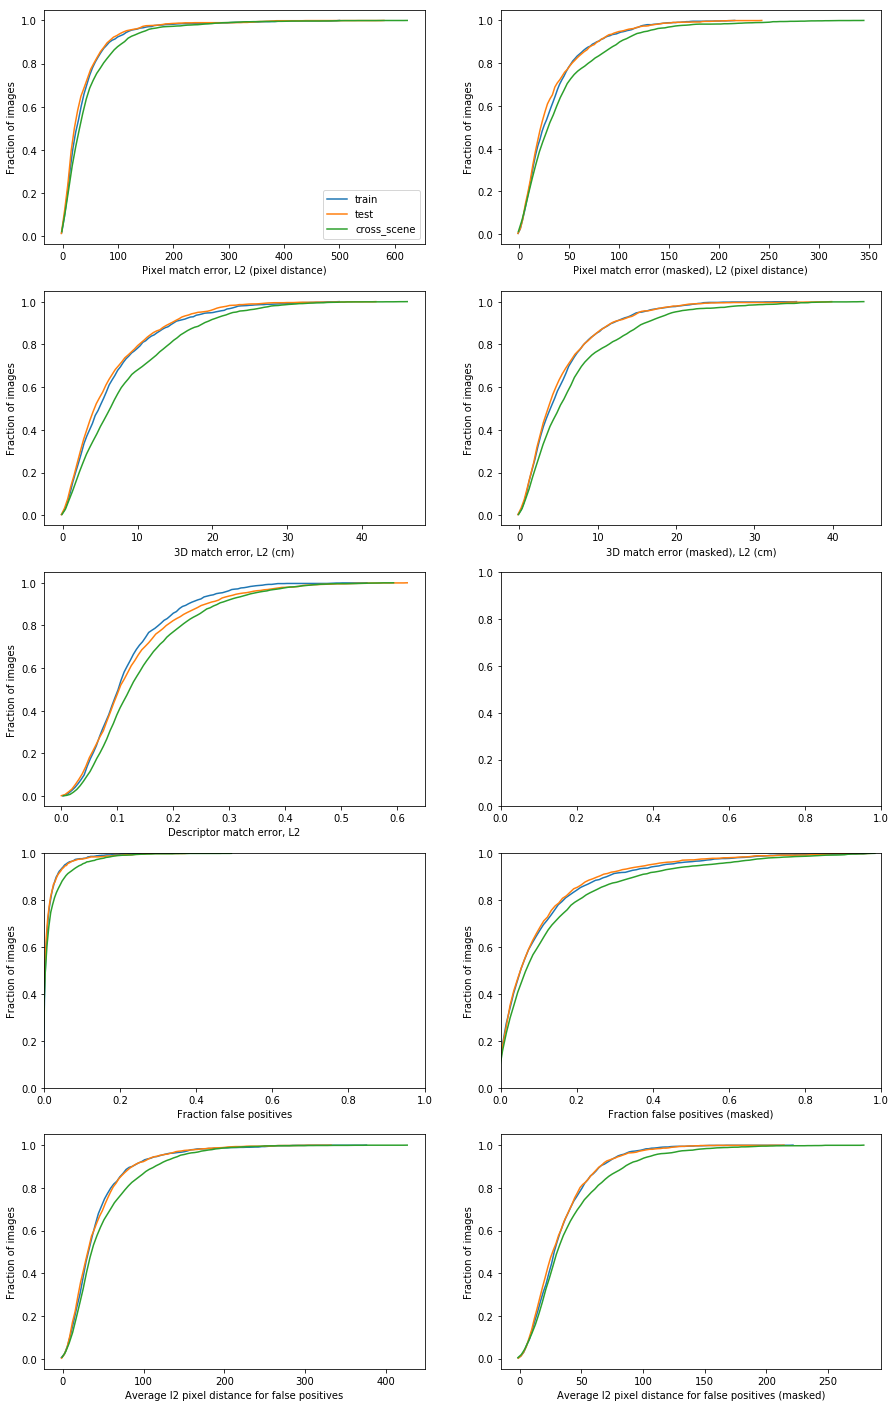

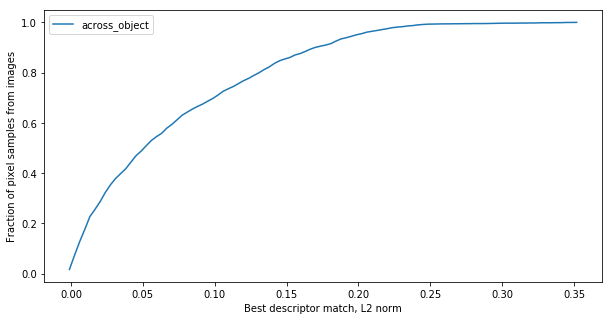

In [8]:
dataset_config = utils.getDictFromYamlFilename(dataset_config_filename)

dataset = SpartanDataset(config=dataset_config)
train_config = utils.getDictFromYamlFilename(train_config_file)

name = "l2_dont_scale_hard_negatives_run_2_%d" %(d)
print "training %s" %(name)
train_config = utils.getDictFromYamlFilename(train_config_file)
train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
train._config["training"]["logging_dir"] = logging_dir
train._config["training"]["logging_dir_name"] = name
train._config["training"]["num_iterations"] = num_iterations
train._config["dense_correspondence_network"]["descriptor_dimension"] = d

train._config["loss_function"]["scale_by_hard_negatives"] = False
train._config["loss_function"]["use_l2_pixel_loss_on_masked_non_matches"] = True


if TRAIN:
    train.run()
print "finished training descriptor of dimension %d" %(d)

 # now do evaluation
print "running evaluation on network %s" %(name)
model_folder = os.path.join(logging_dir, name)
model_folder = utils.convert_to_absolute_path(model_folder)
network_dict[name] = model_folder
if EVALUATE:
    DCE = DenseCorrespondenceEvaluation
    DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)
print "finished running evaluation on network %s" %(name)